In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

model1 = LinearRegression()

from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv('coronainfo3.csv')
data2 = pd.read_csv('coronainfo2.csv')
data3 = pd.read_csv('coronainfo(old).csv')
x1 = data['date']
y1 = data['total_cases']
x2 = data2['date']
y2 = data2['total_cases']
x3 = data3['date']
y3 = data3['total_cases']
#print(x,y)

In [3]:
len(x2)/5
print([i**2 for i in range(10)])
[i*14 for i in range(0,5)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


[0, 14, 28, 42, 56]

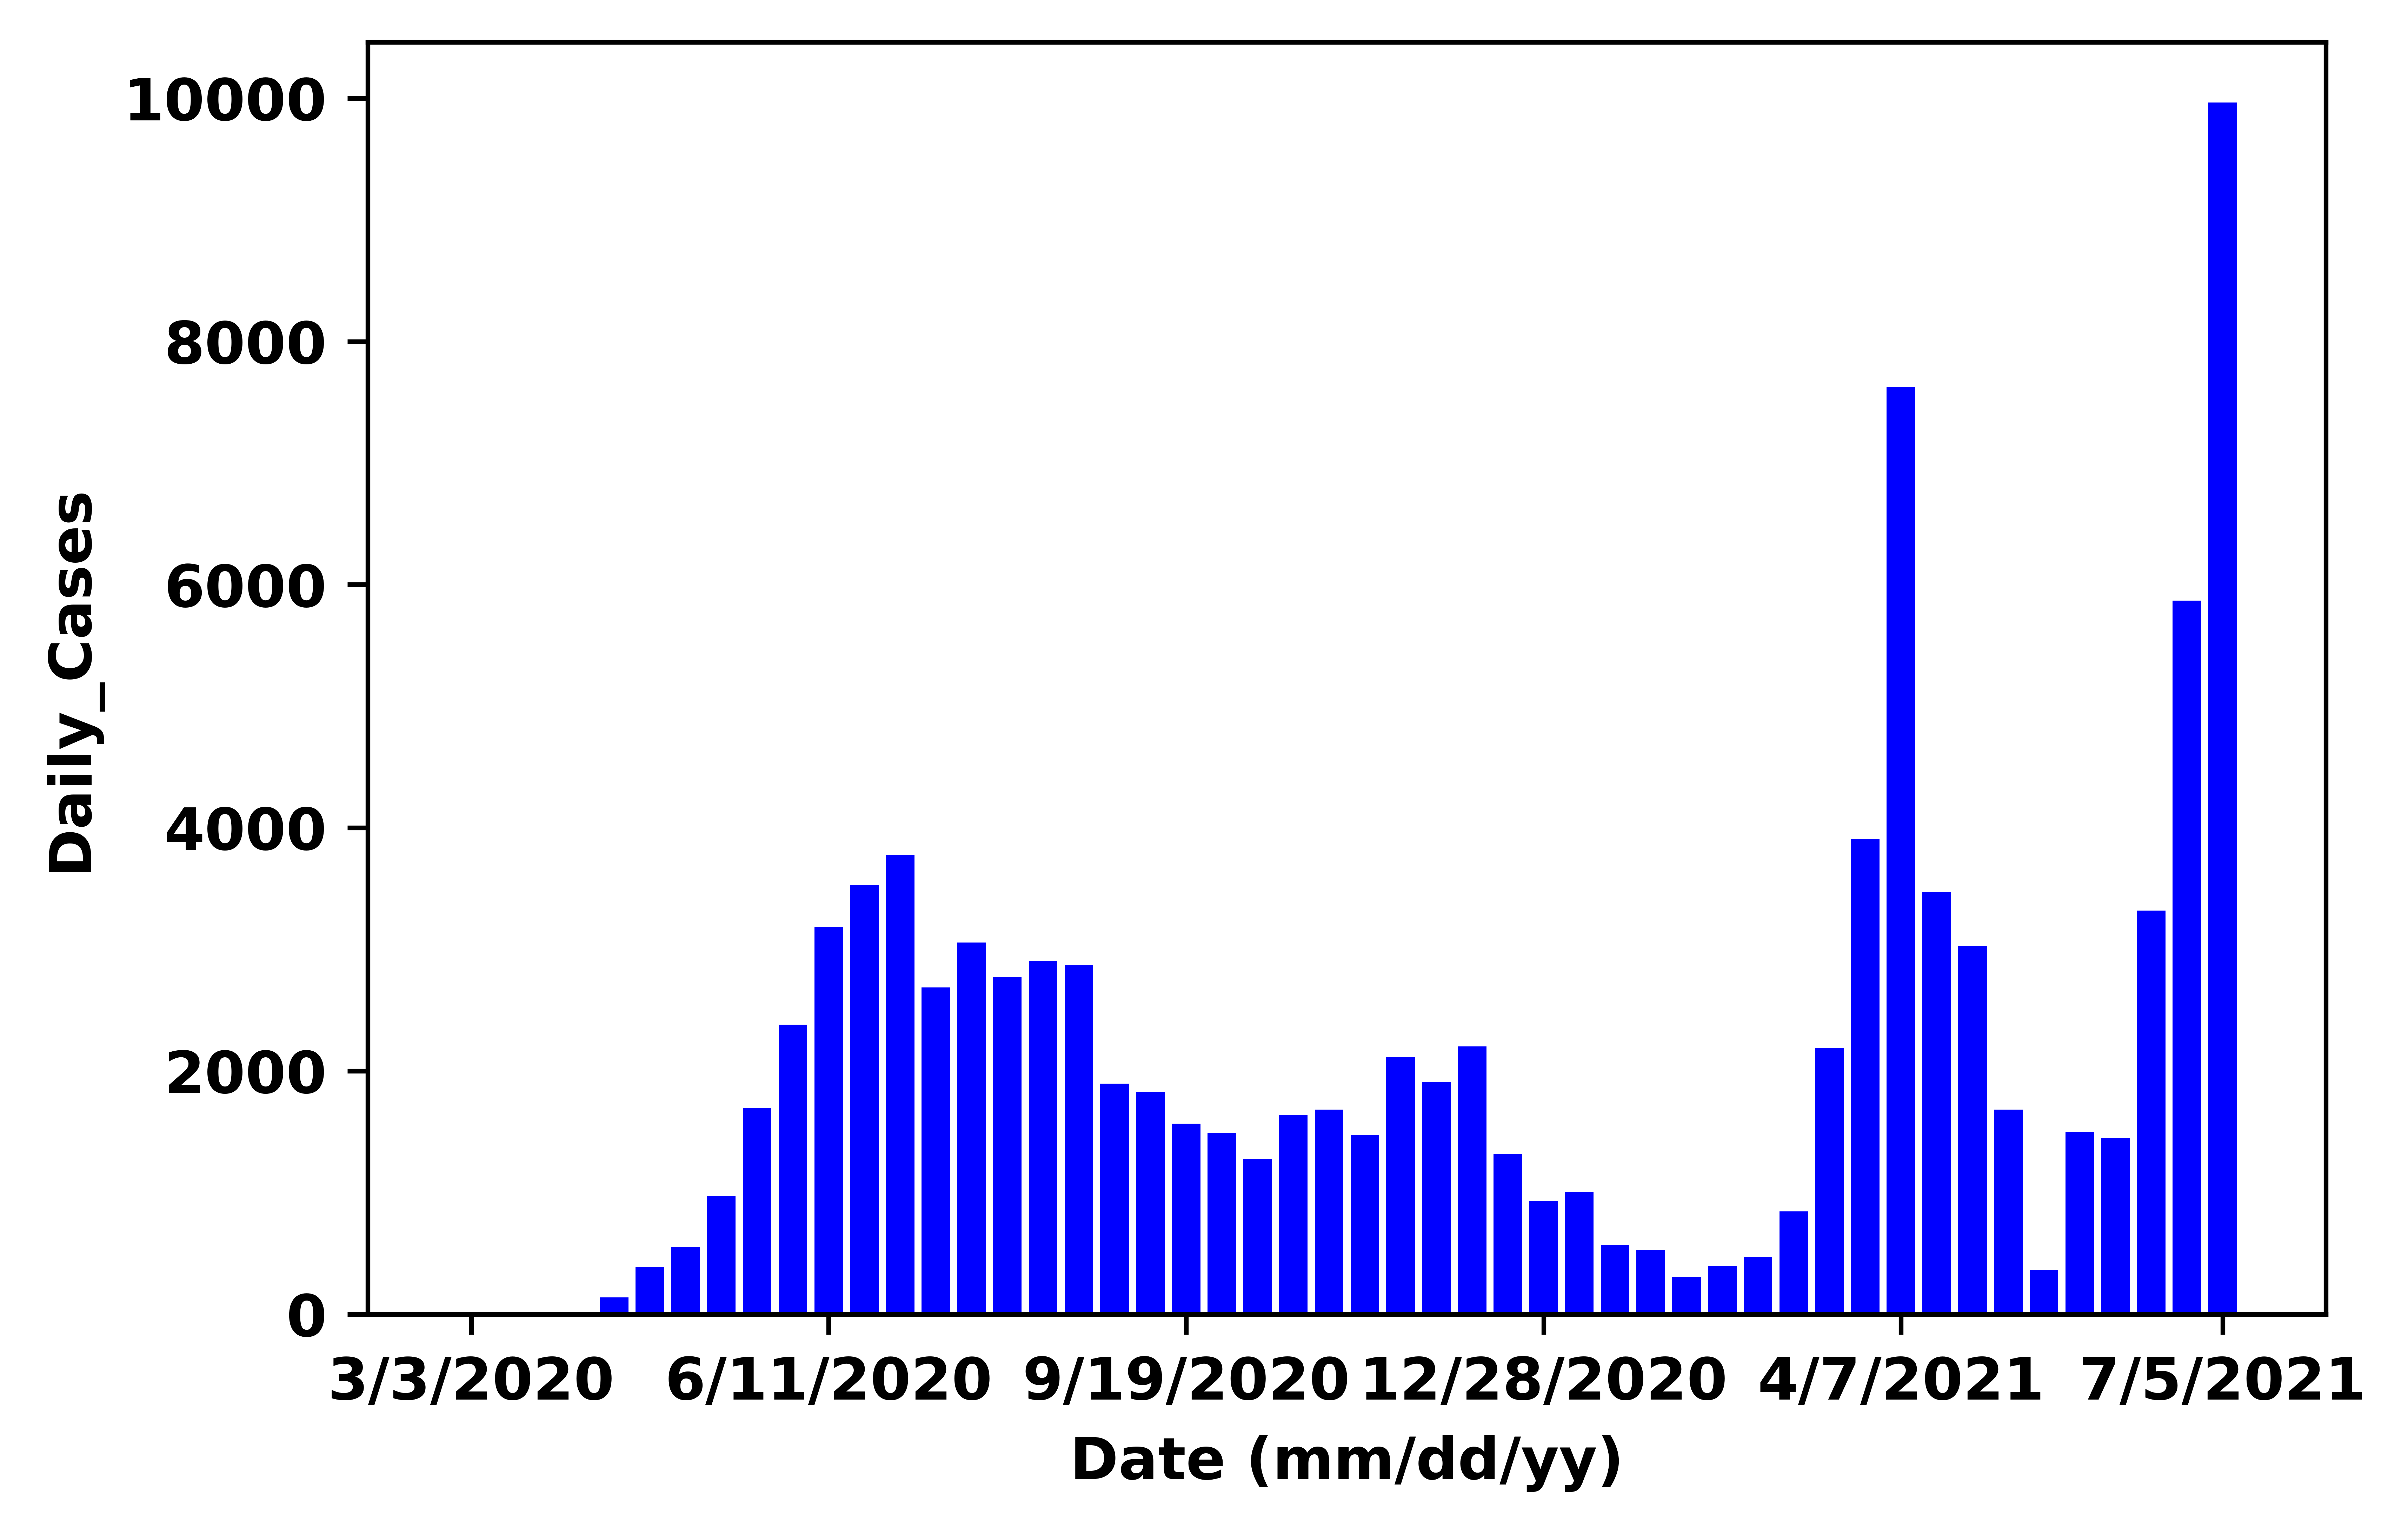

In [4]:
#csfont = {'fontname':'Comic Sans MS'}
#plt.xlabel("Date",**csfont, fontweight="bold")
#plt.ylabel("Total_Cases",**csfont, fontweight="bold")
figure(dpi=1200)
plt.xlabel("Date (mm/dd/yy)", fontweight="bold")
plt.ylabel("Daily_Cases", fontweight="bold")
for i in range(int(len(data['new_cases'])/10)+1):  
    plt.xticks([0,10,20,30,40,49], fontweight="bold")
    plt.yticks([0,2000,4000,6000,8000,10000], fontweight="bold")
    plt.bar(data['date'][i*10], data['new_cases'][i*10], color='blue')
plt.show()


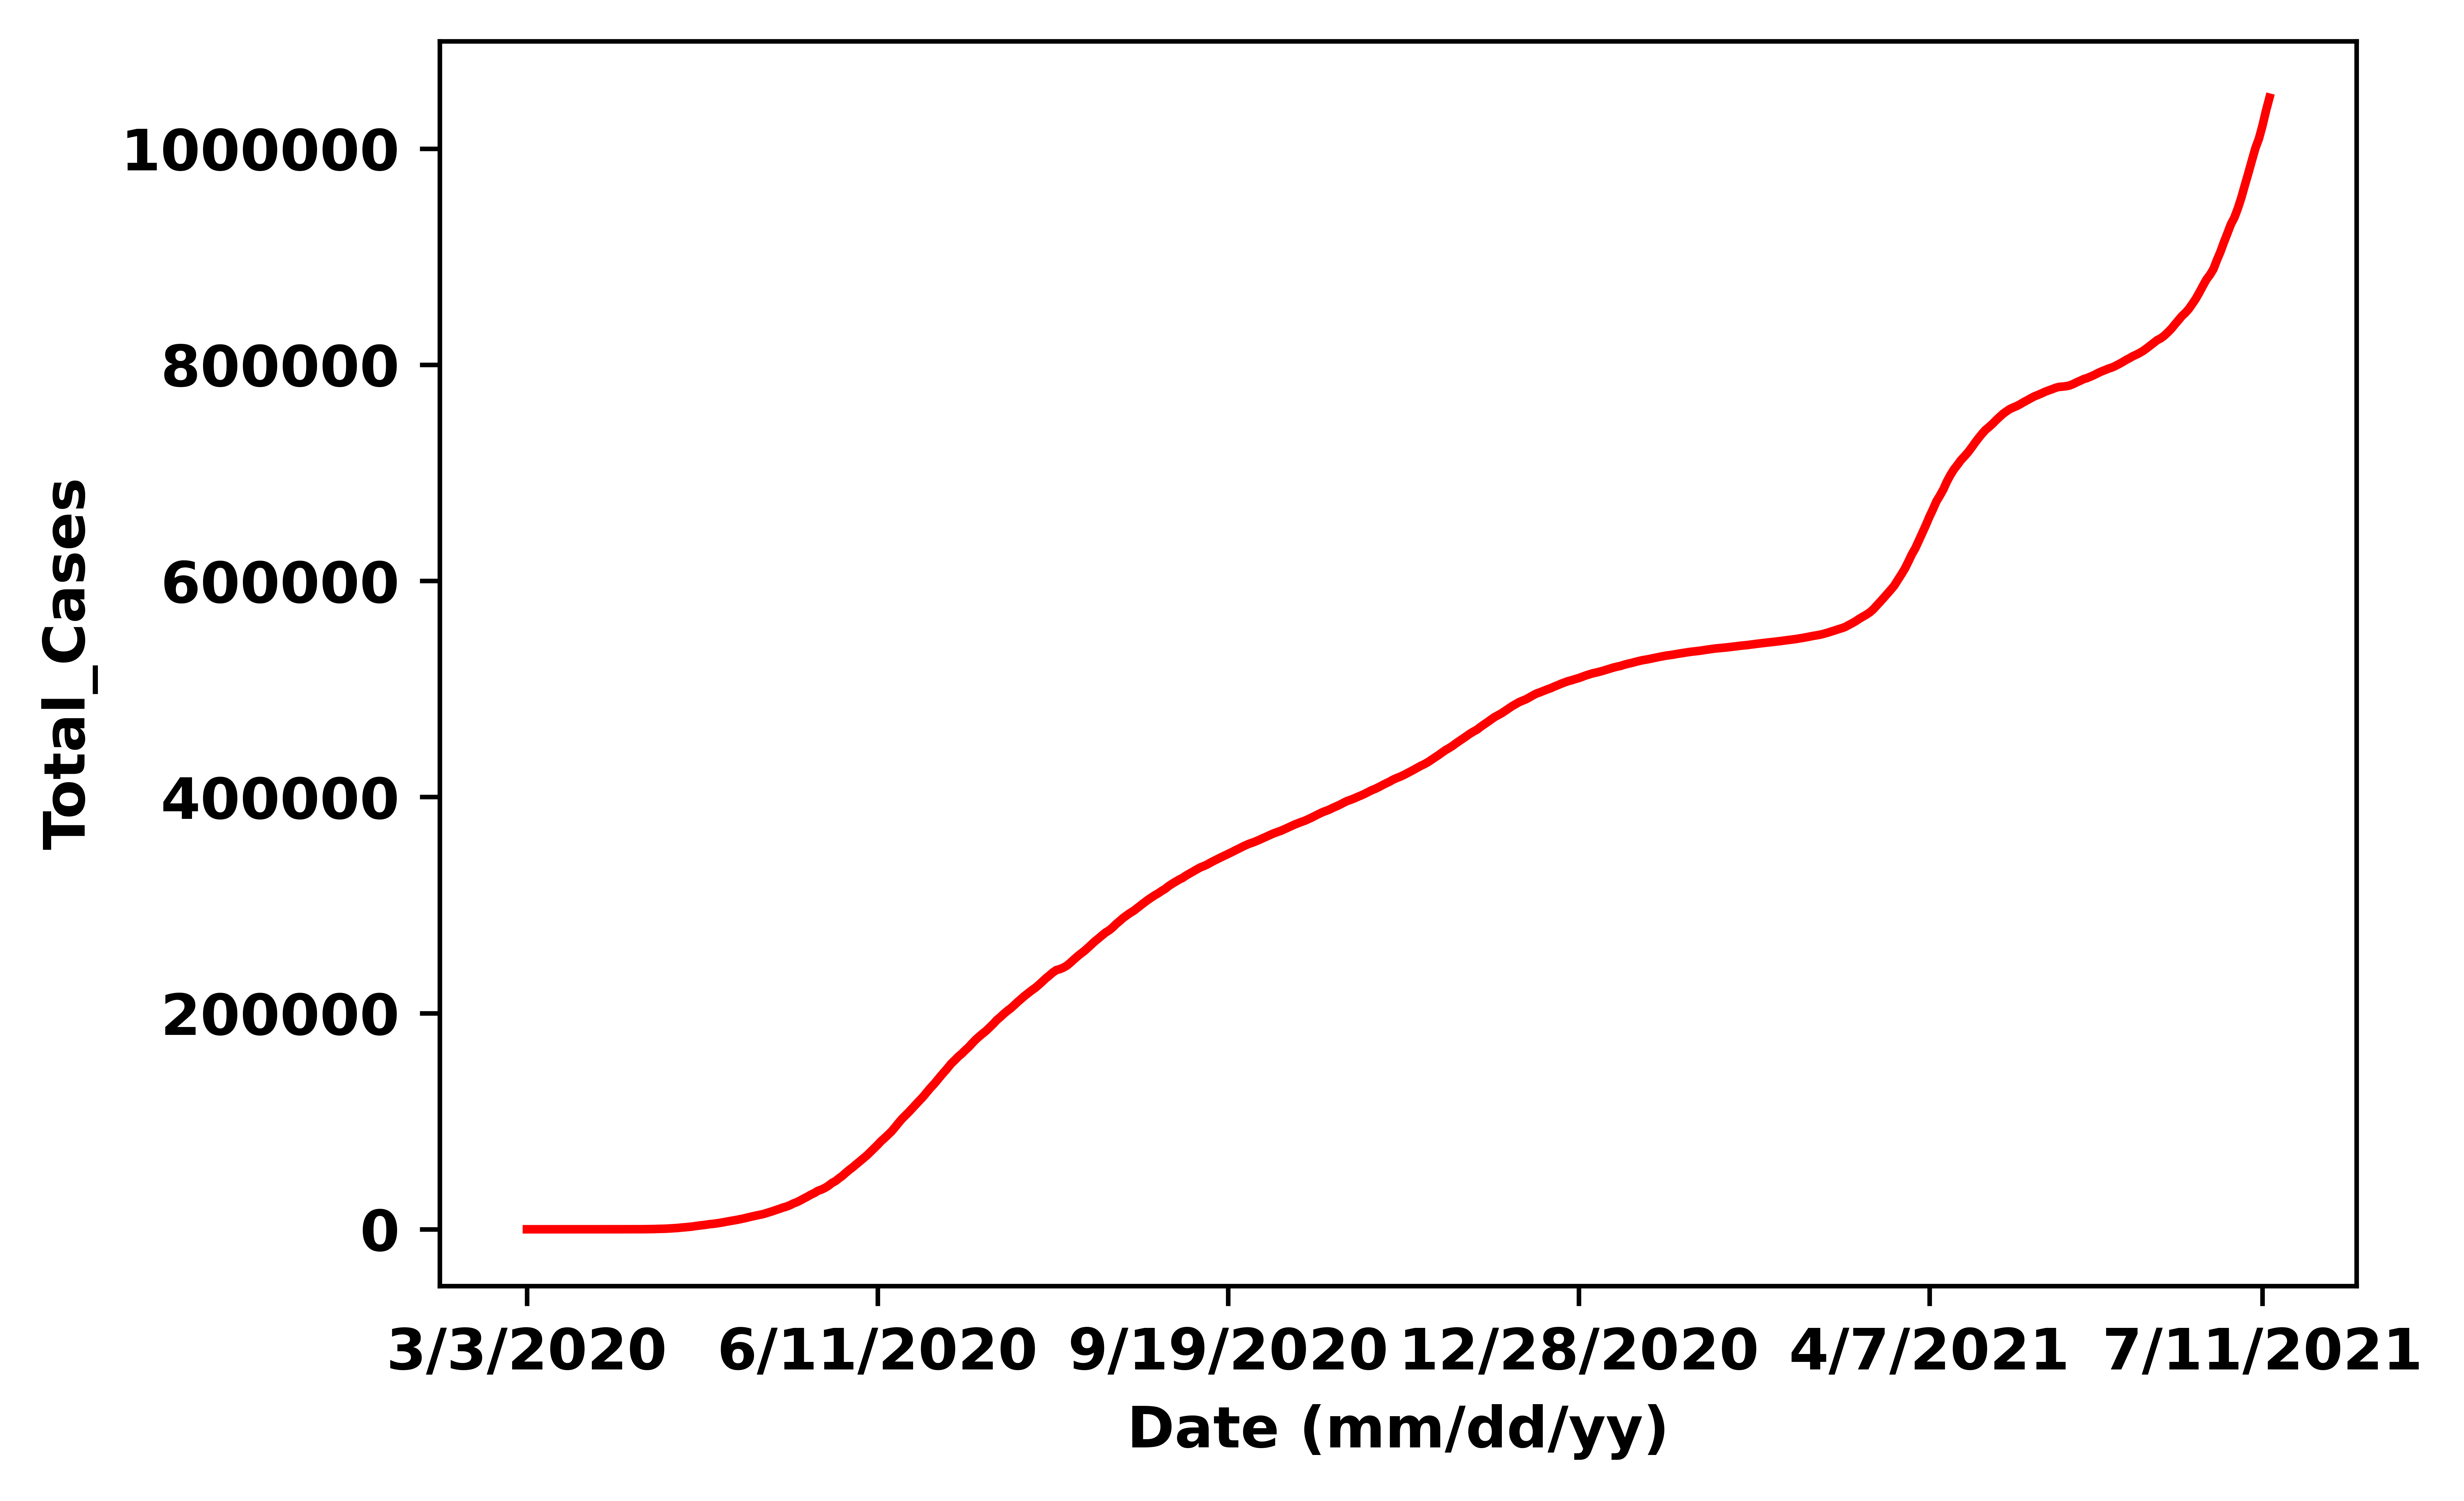

In [5]:
figure(dpi=1200)
plt.xticks([0,100,200,300,400,495], fontweight="bold")
plt.yticks((0,200000,400000,600000,800000,1000000),('0','200000','400000','600000','800000','1000000'), fontweight="bold")
#plt.title("Covid19 Bangladesh")
plt.xlabel("Date (mm/dd/yy)", fontweight="bold")
plt.ylabel("Total_Cases", fontweight="bold")
plt.plot(x1,y1, 'r')
#fig = plt.gcf()
#fig.set_size_inches(18.5, 10.5)
#fig.savefig('test2png.png', dpi=10)

In [6]:
#plt.plot(x2,y2, 'g.')
#plt.show()

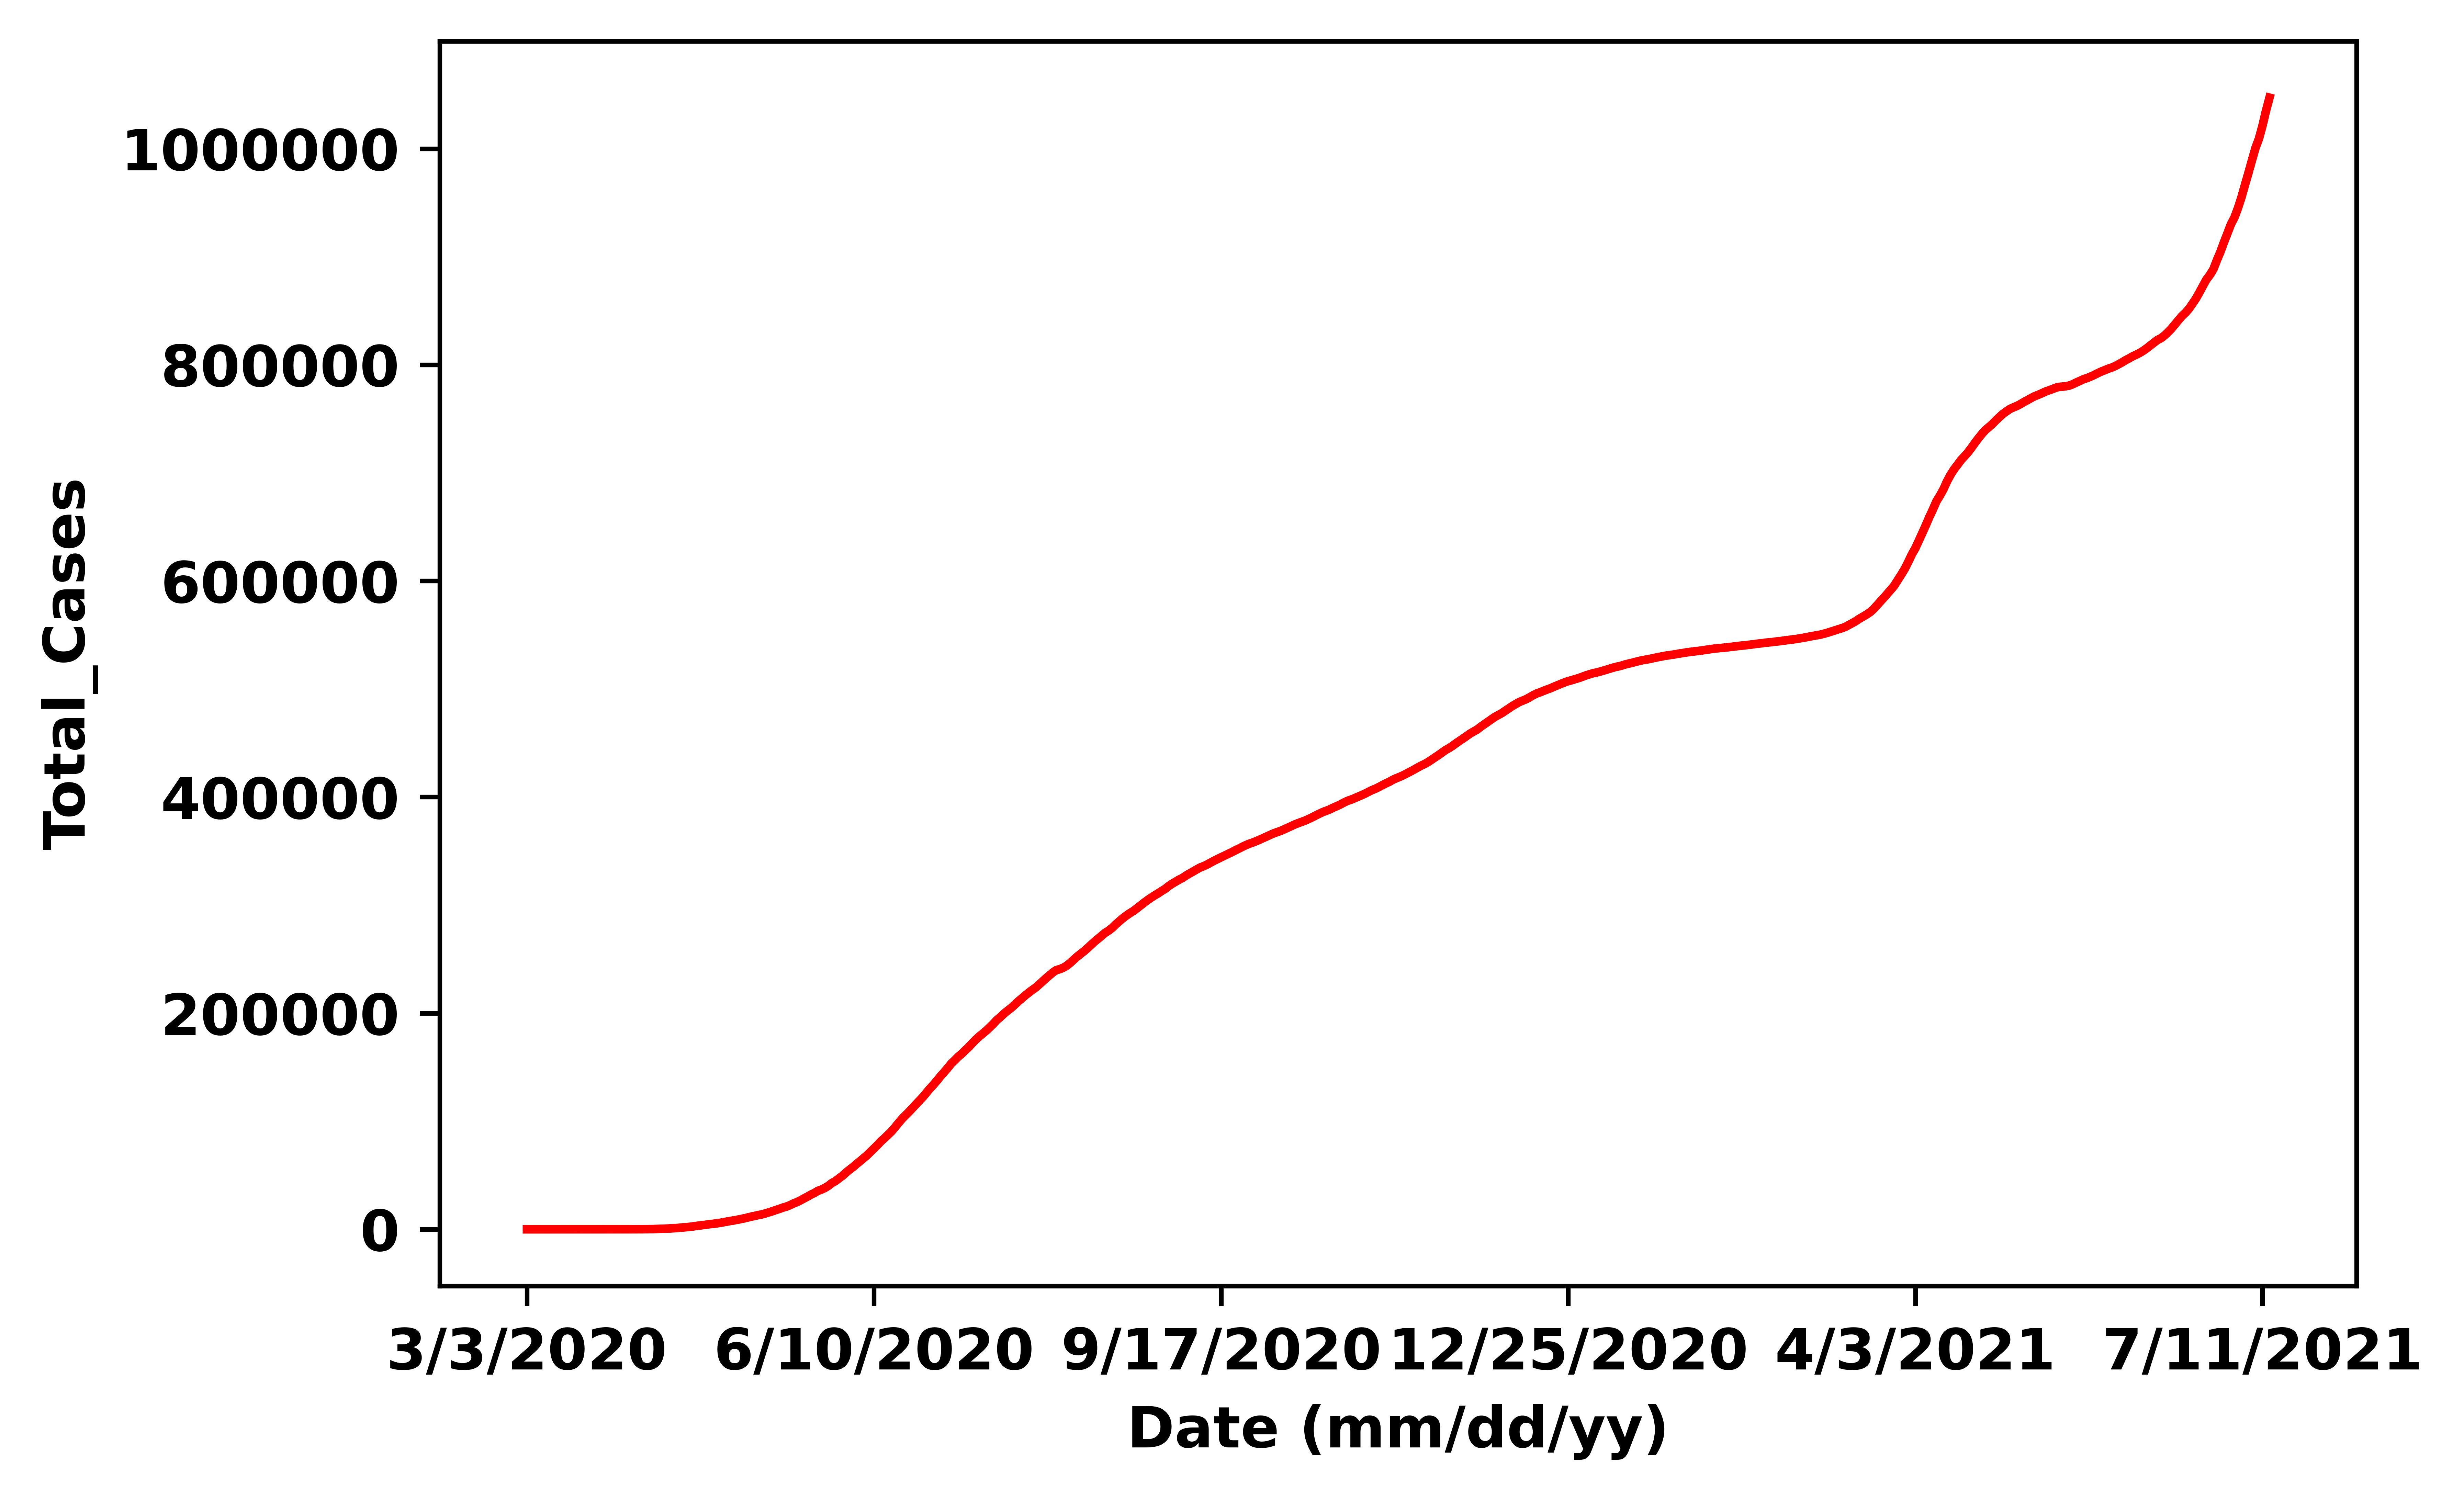

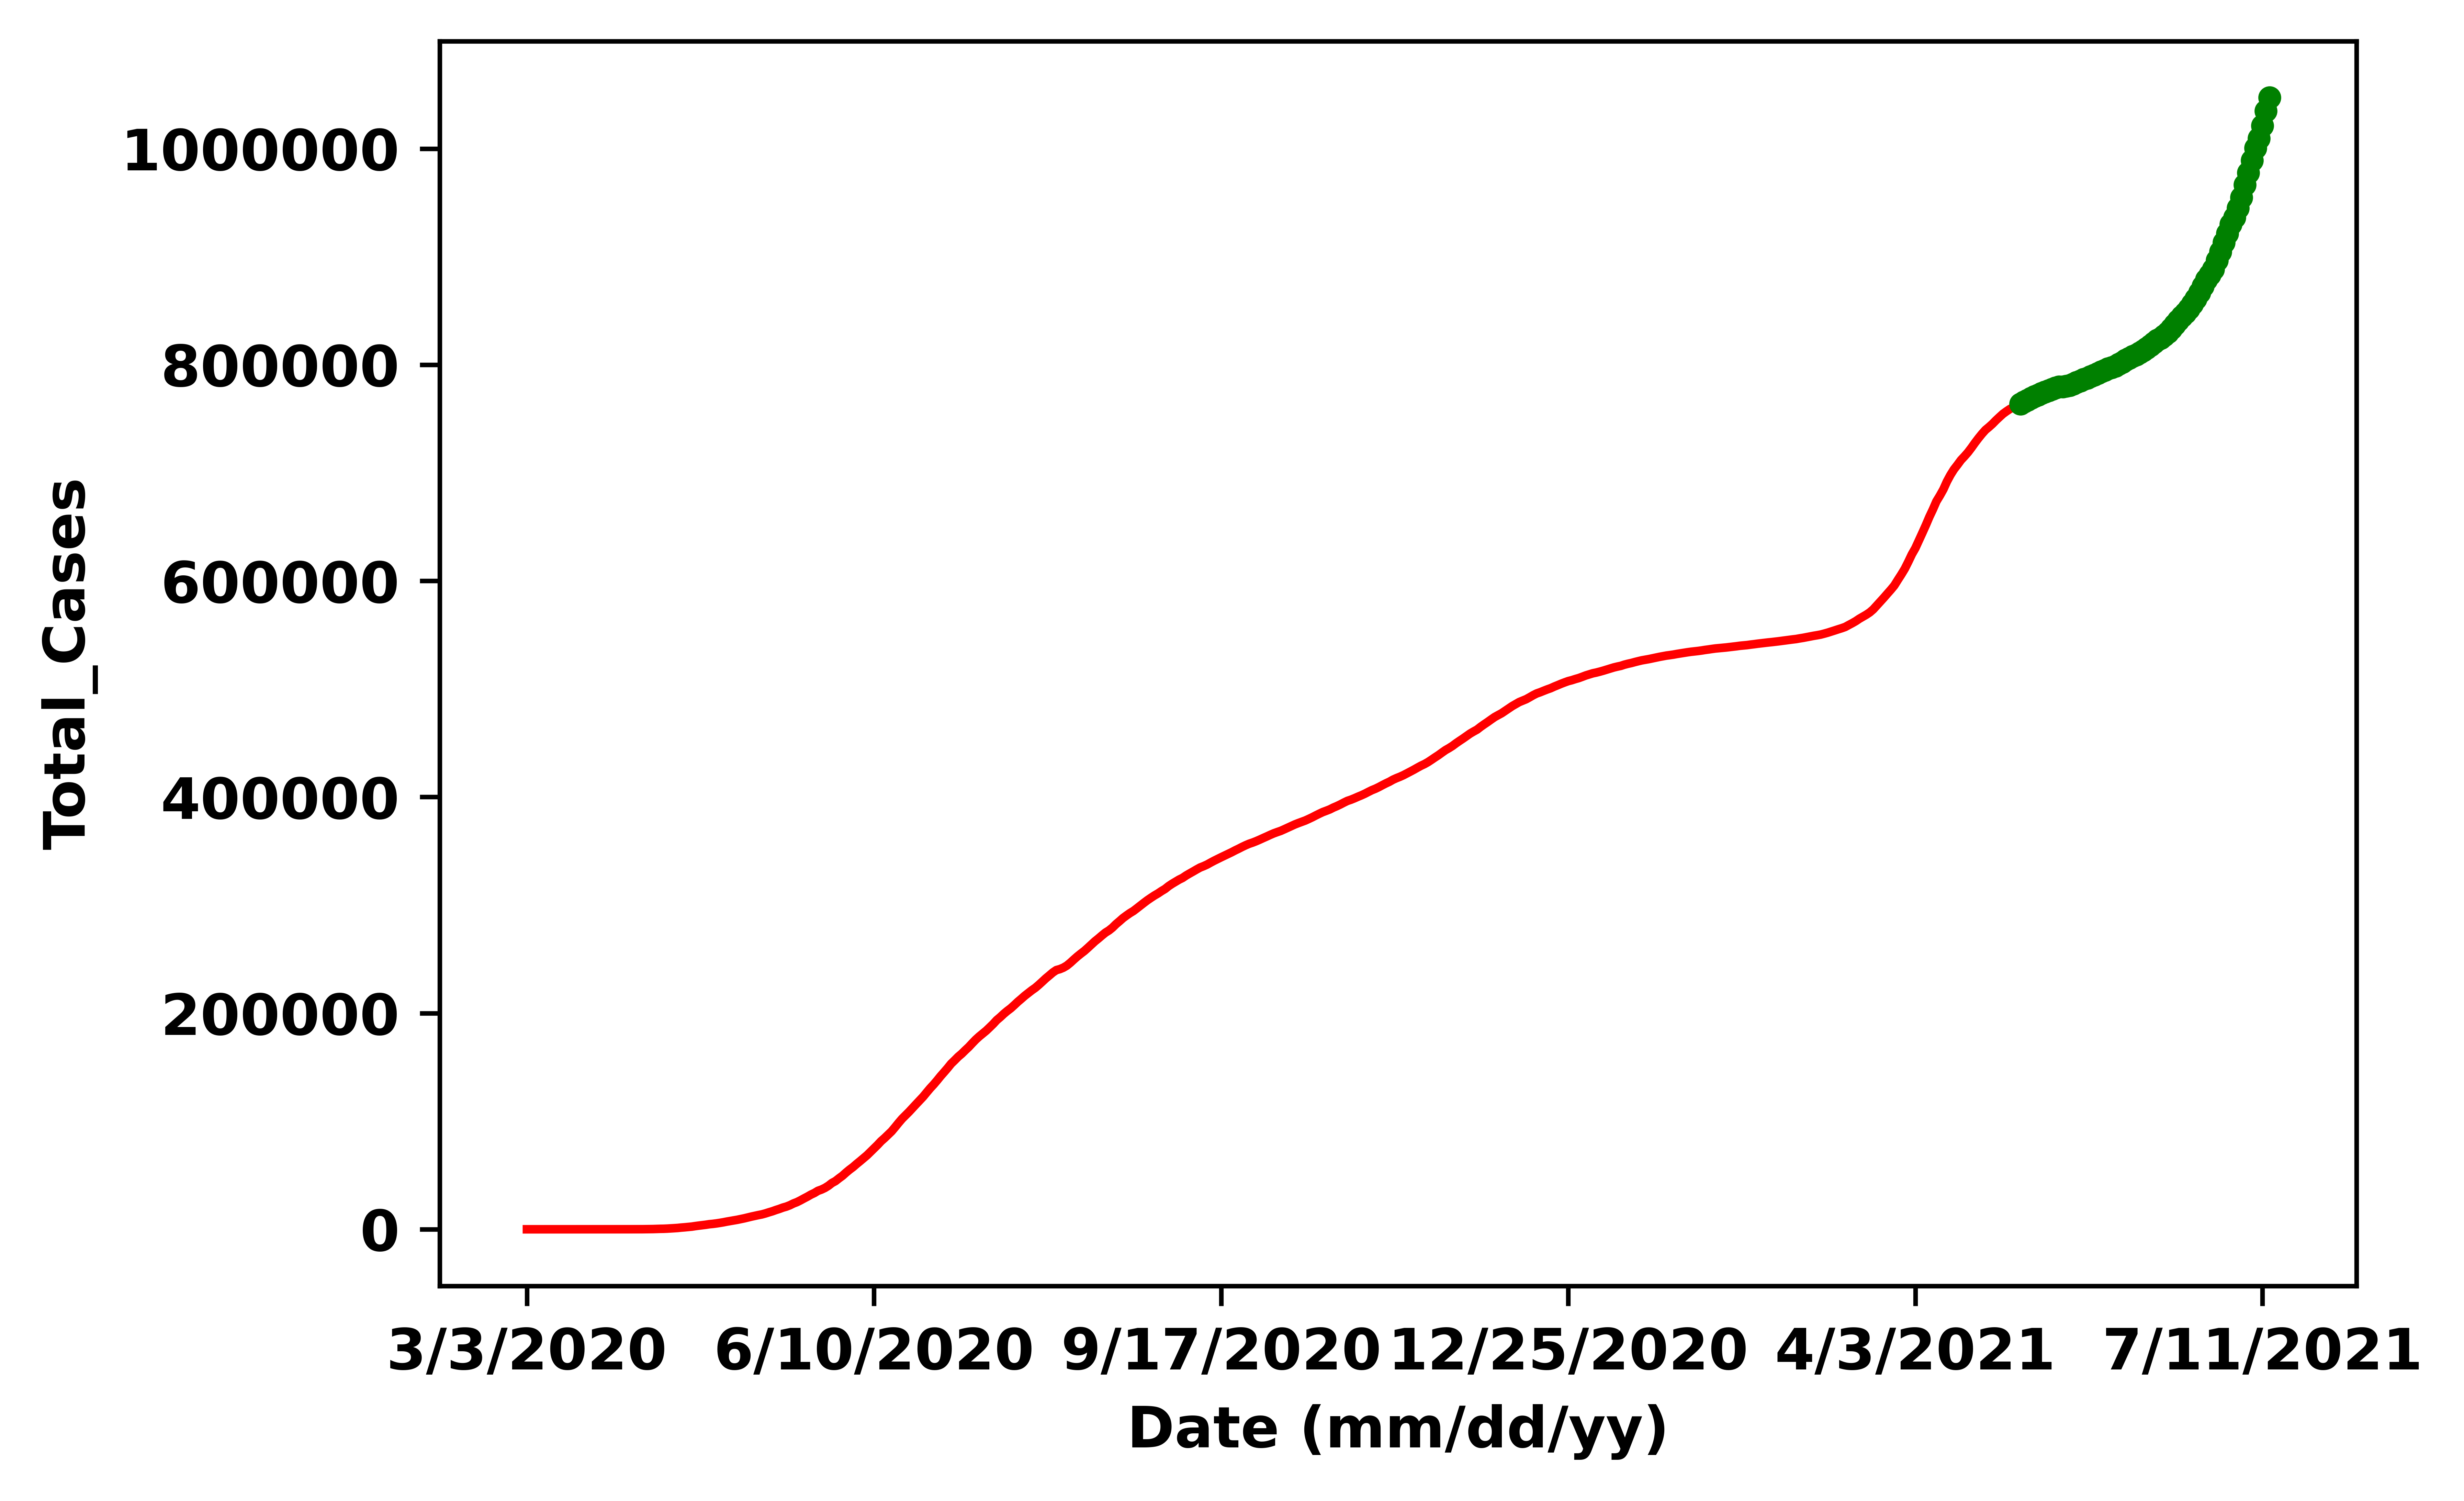

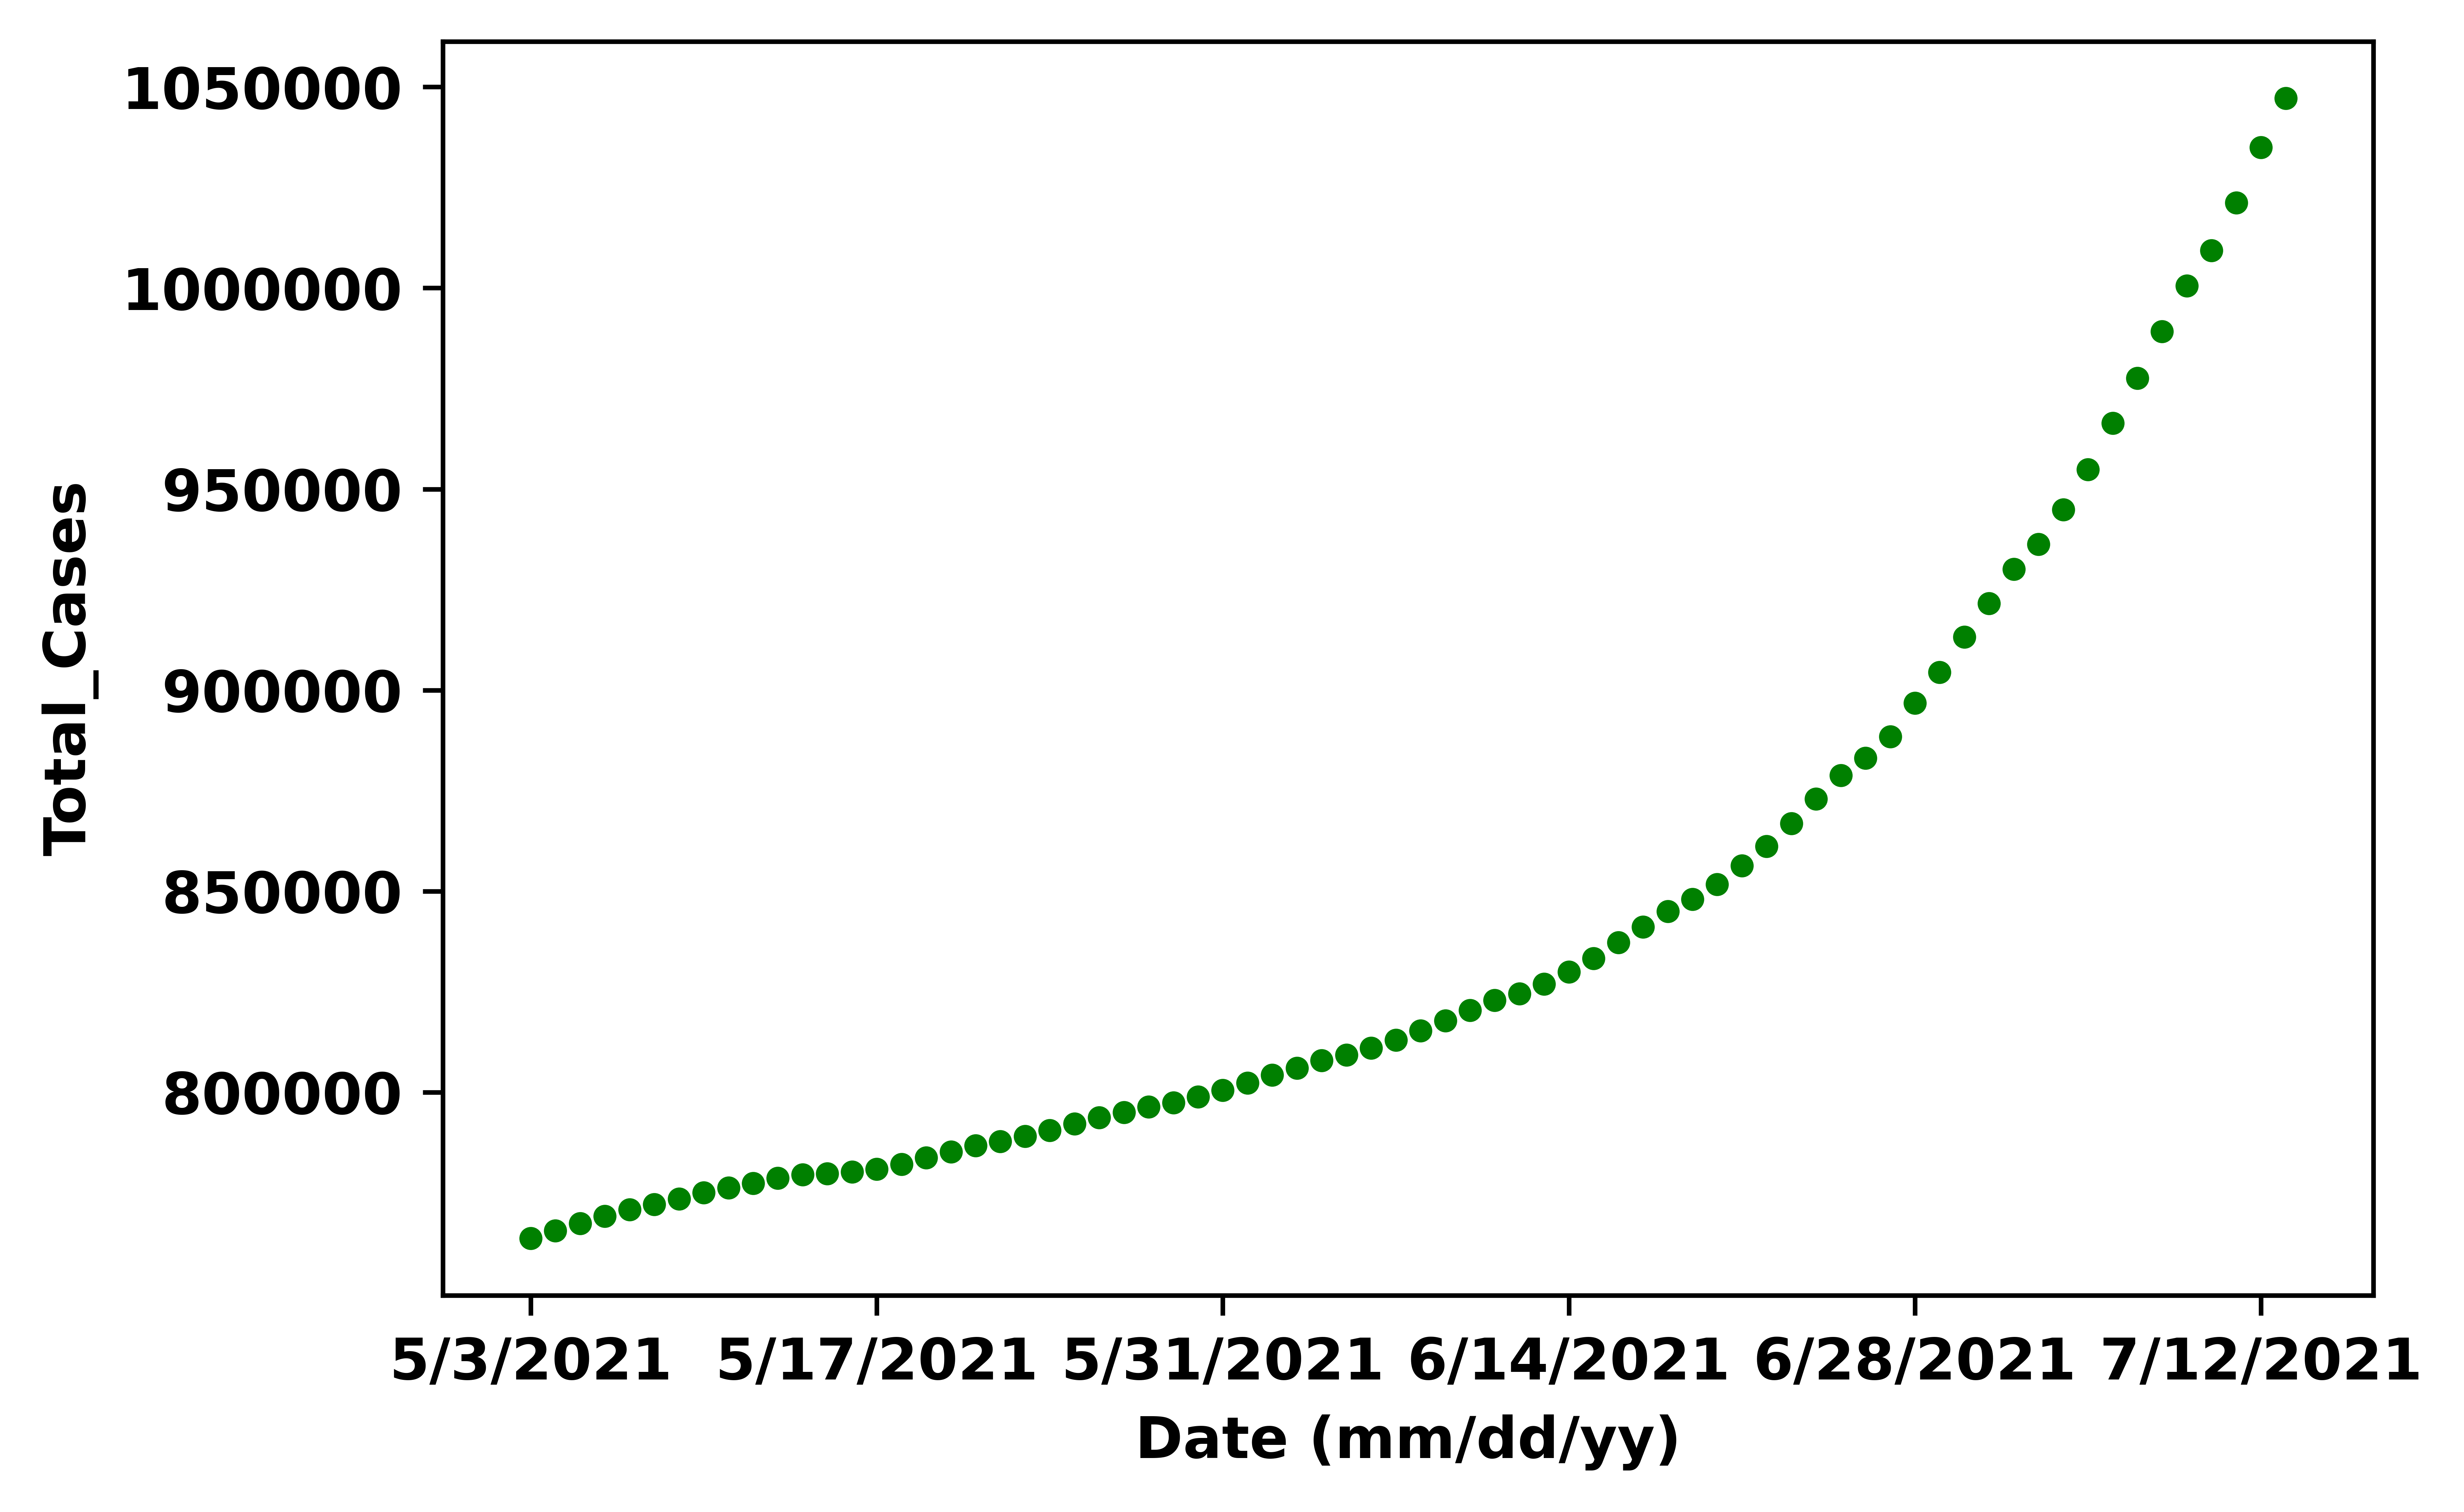

In [6]:
figure(dpi=1200)
plt.xlabel("Date (mm/dd/yy)", fontweight="bold")
plt.ylabel("Total_Cases", fontweight="bold")
plt.xticks([i*99 for i in range(0,6)], fontweight="bold")
plt.yticks((0,200000,400000,600000,800000,1000000),('0','200000','400000','600000','800000','1000000'), fontweight="bold")
plt.plot(x1,y1, 'r')
plt.show()
figure(dpi=1200)
plt.xlabel("Date (mm/dd/yy)", fontweight="bold")
plt.ylabel("Total_Cases", fontweight="bold")
plt.xticks([0,99,198,297,396,495], fontweight="bold")
plt.yticks((0,200000,400000,600000,800000,1000000),('0','200000','400000','600000','800000','1000000'), fontweight="bold")
plt.plot(x1,y1, 'r')
plt.plot(x2,y2, 'g.')
plt.show()
figure(dpi=1200)
plt.xlabel("Date (mm/dd/yy)", fontweight="bold")
plt.ylabel("Total_Cases", fontweight="bold")
plt.xticks([i*14 for i in range(0,6)], fontweight="bold")
plt.yticks((0,800000,850000,900000,950000,1000000,1050000),('0','800000','850000','900000','950000','1000000','1050000'), fontweight="bold")
plt.plot(x2,y2, 'g.')
plt.show()

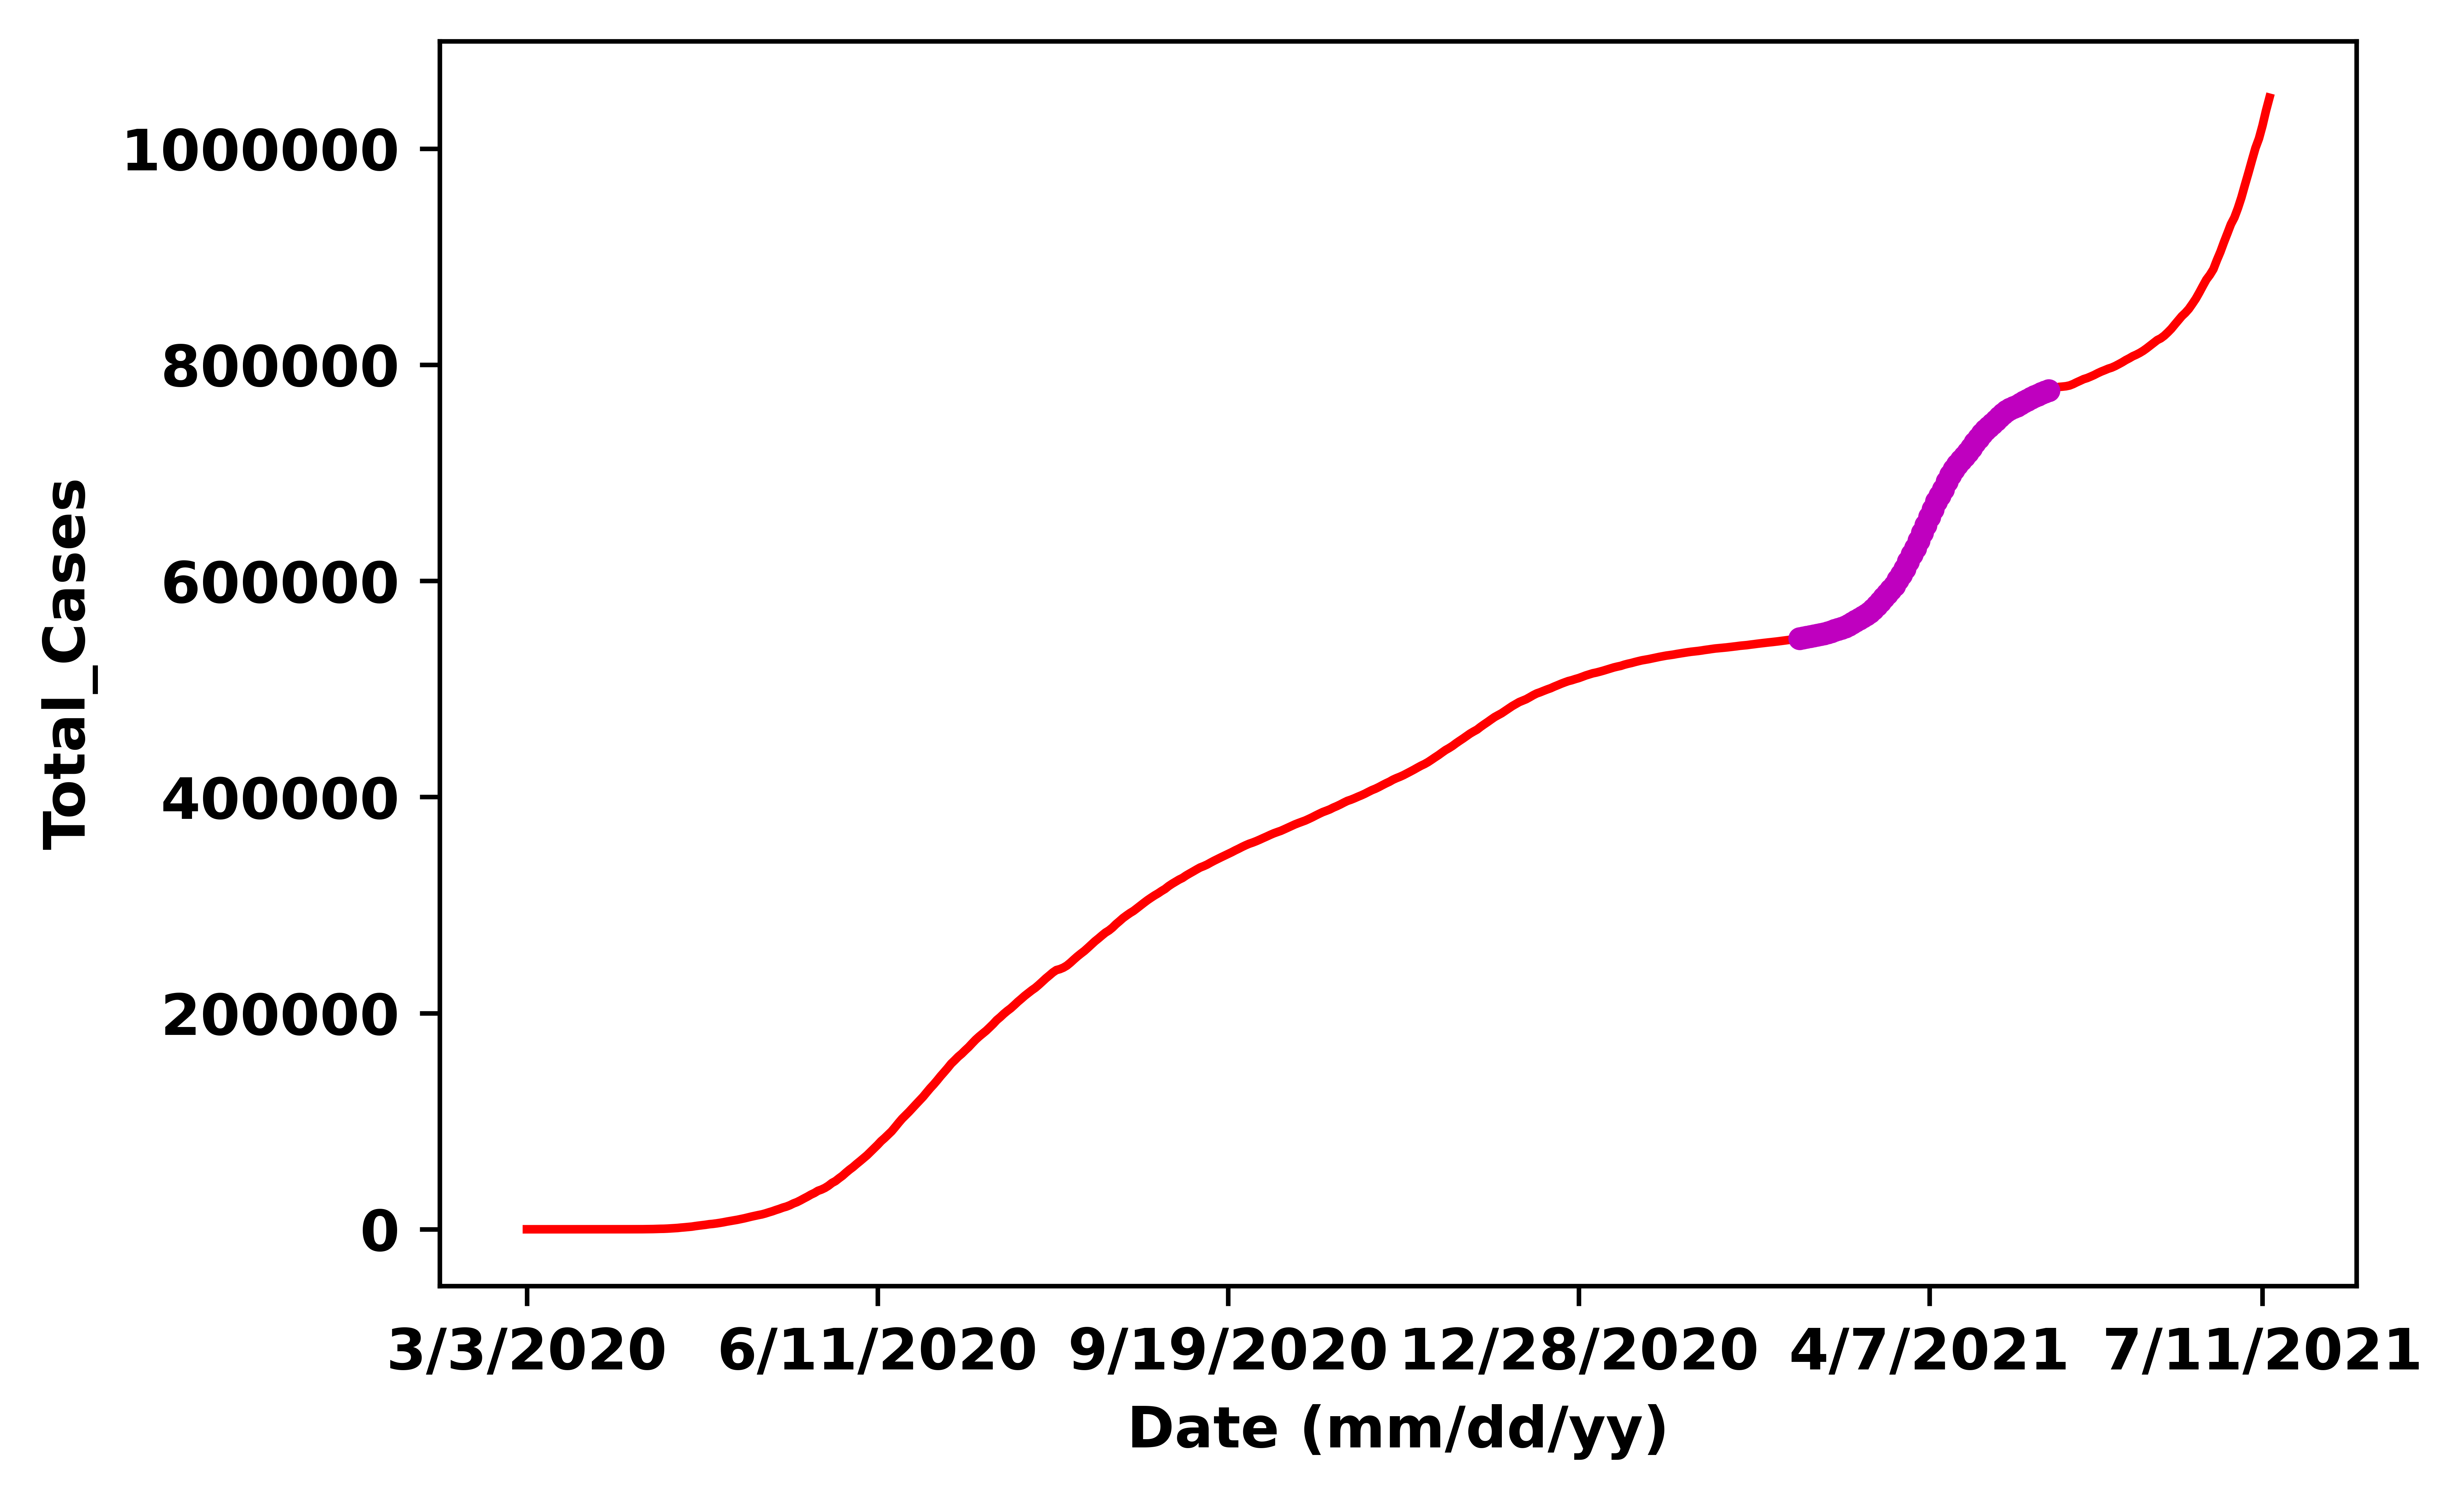

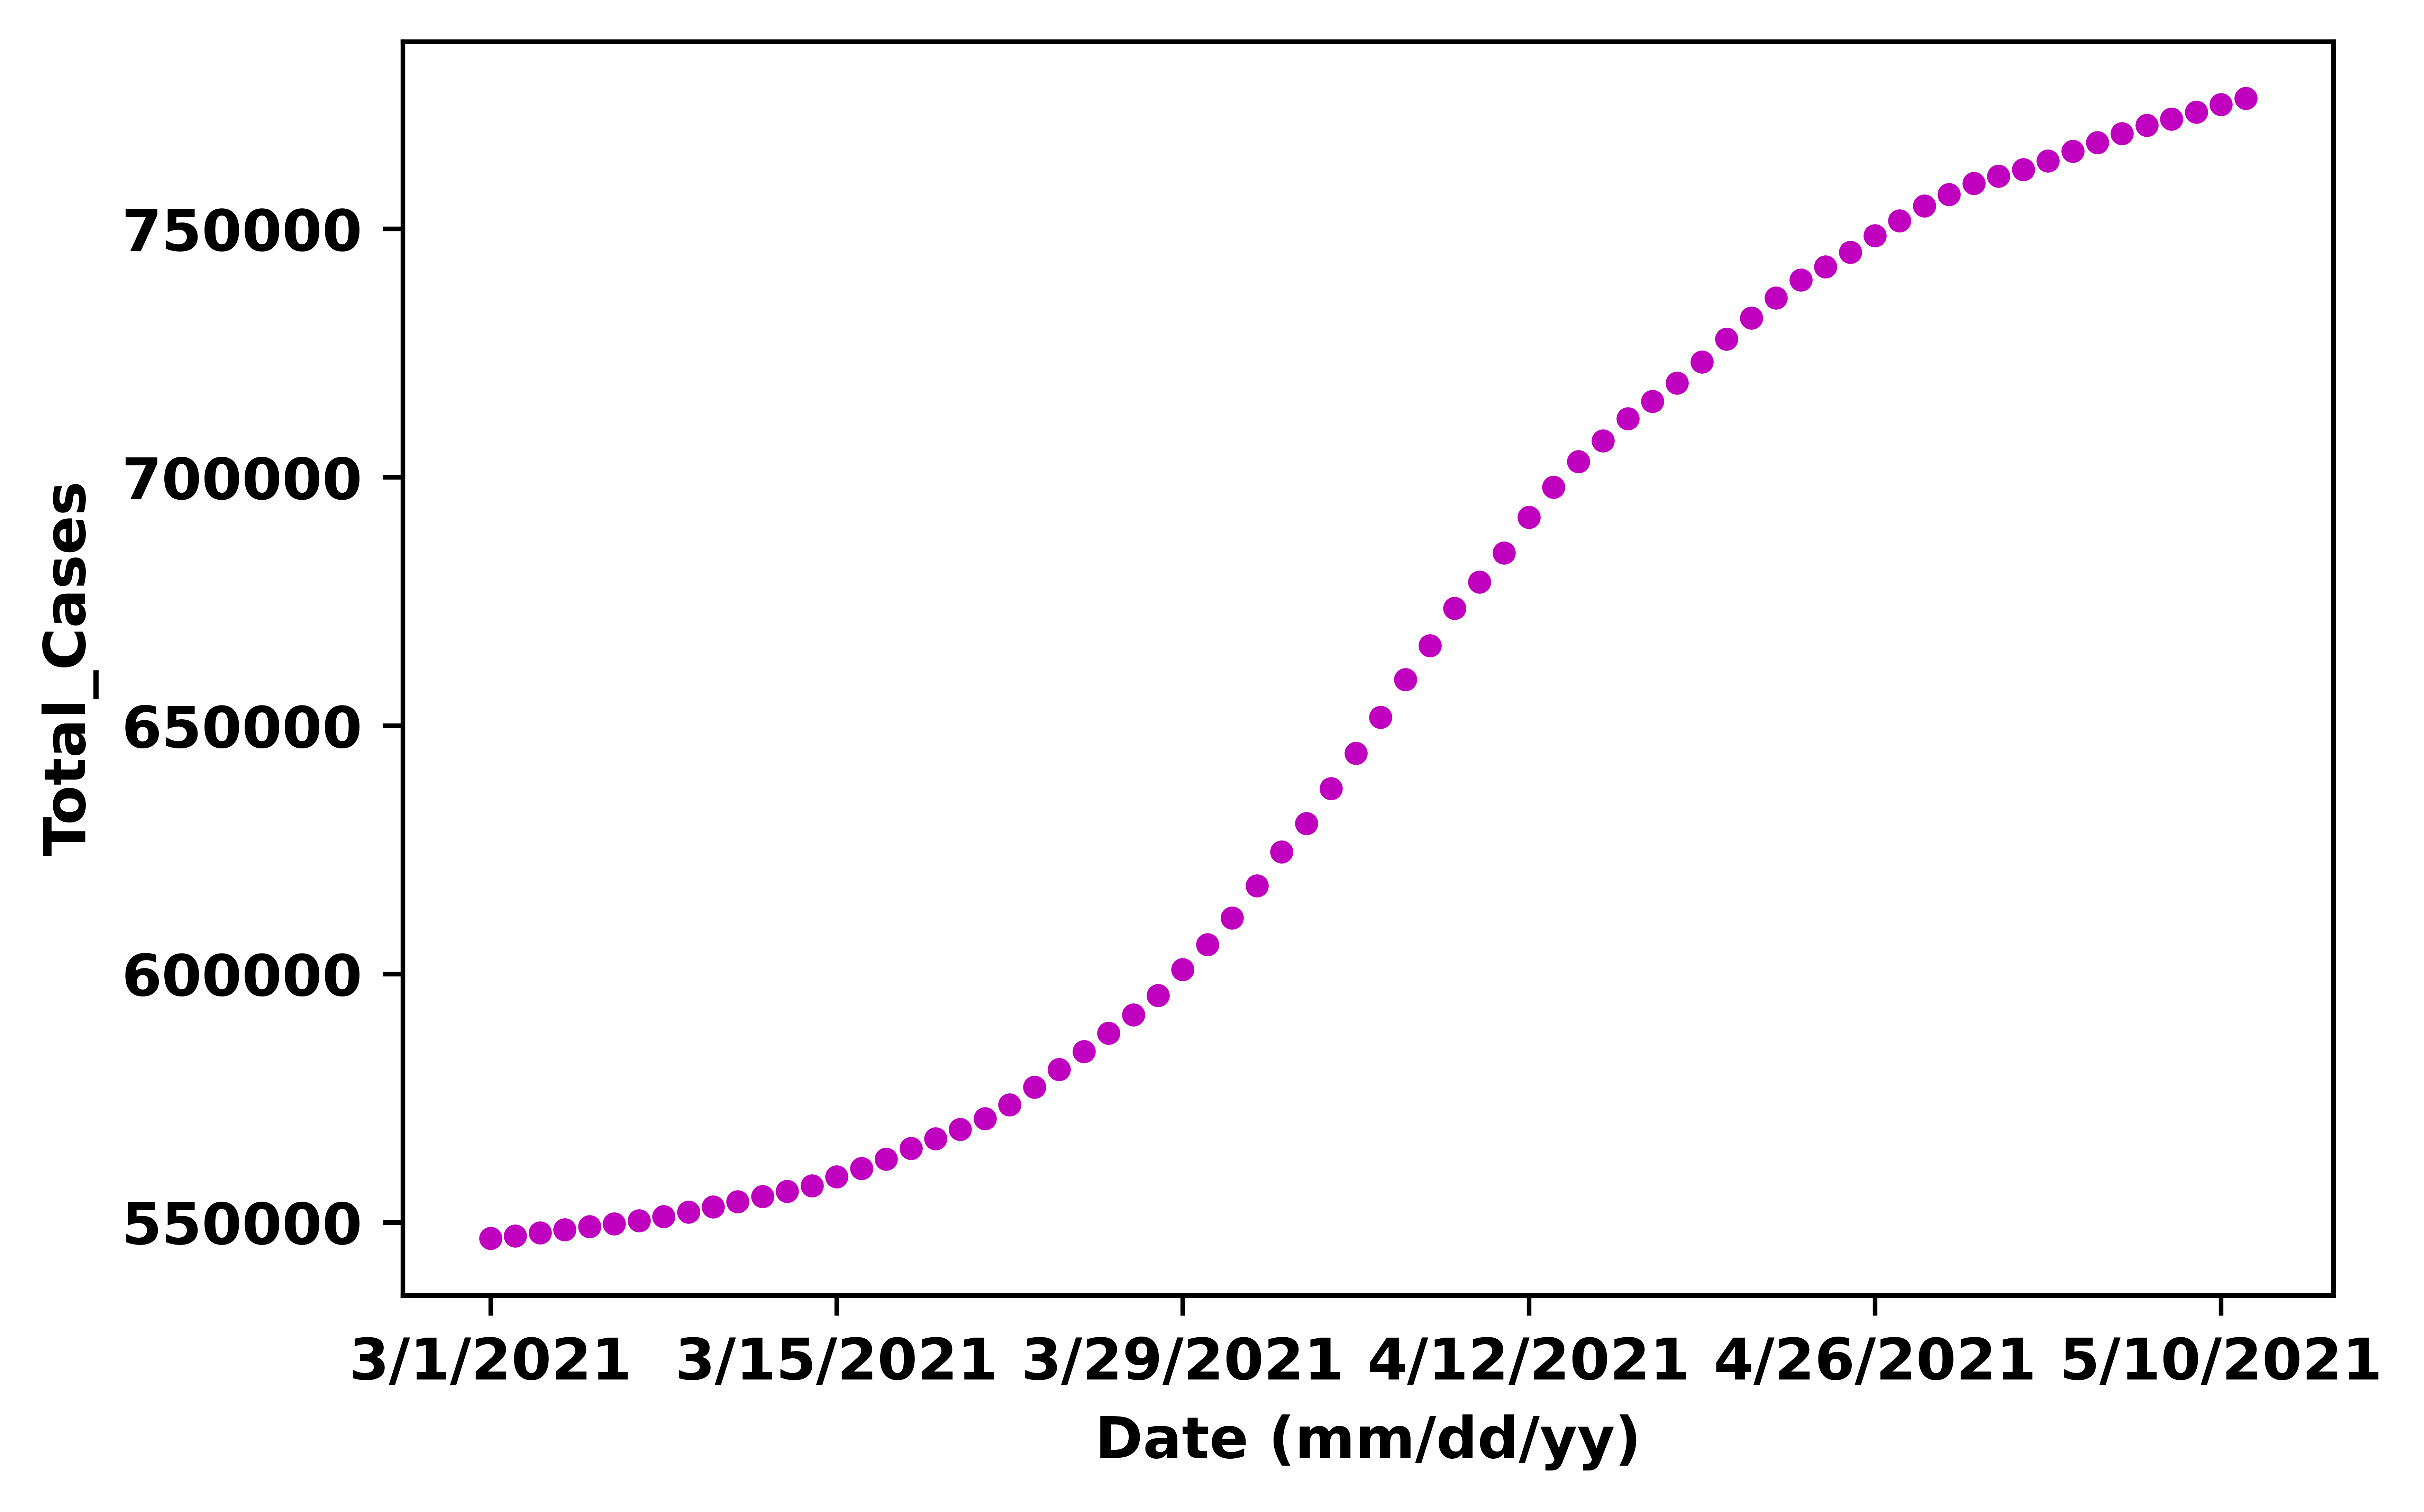

In [7]:
figure(dpi=1200)
plt.xlabel("Date (mm/dd/yy)", fontweight="bold")
plt.ylabel("Total_Cases", fontweight="bold")
plt.xticks([0,100,200,300,400, 495], fontweight="bold")
plt.yticks((0,200000,400000,600000,800000,1000000),('0','200000','400000','600000','800000','1000000'), fontweight="bold")
plt.plot(x1,y1, 'r')
plt.plot(x3,y3, 'm.')
plt.show()
figure(dpi=1200)
plt.xlabel("Date (mm/dd/yy)", fontweight="bold")
plt.ylabel("Total_Cases", fontweight="bold")
plt.xticks([i*14 for i in range(0,6)], fontweight="bold")
plt.yticks([550000,600000,650000,700000,750000], fontweight='bold')
plt.plot(x3,y3, 'm.')
plt.show()

In [8]:
def sigfunc2(xn,c11,c12,c13,c14):
    return  546801 + c11/(c12+c13*np.exp(-c14*(xn-20)))
vg = [300000, 1, 10, 0.09]


n = len(x3)

prb = np.empty(n)

for i in range(n):
    prb[i] = sigfunc2(i, vg[0], vg[1], vg[2], vg[3])


In [9]:
t = data3['no'].values
hr = y3.values
ca, cov = curve_fit(sigfunc2, t, hr, vg)
print(ca)

[1.95930383e+06 8.56231712e+00 7.70417444e+01 1.16990562e-01]


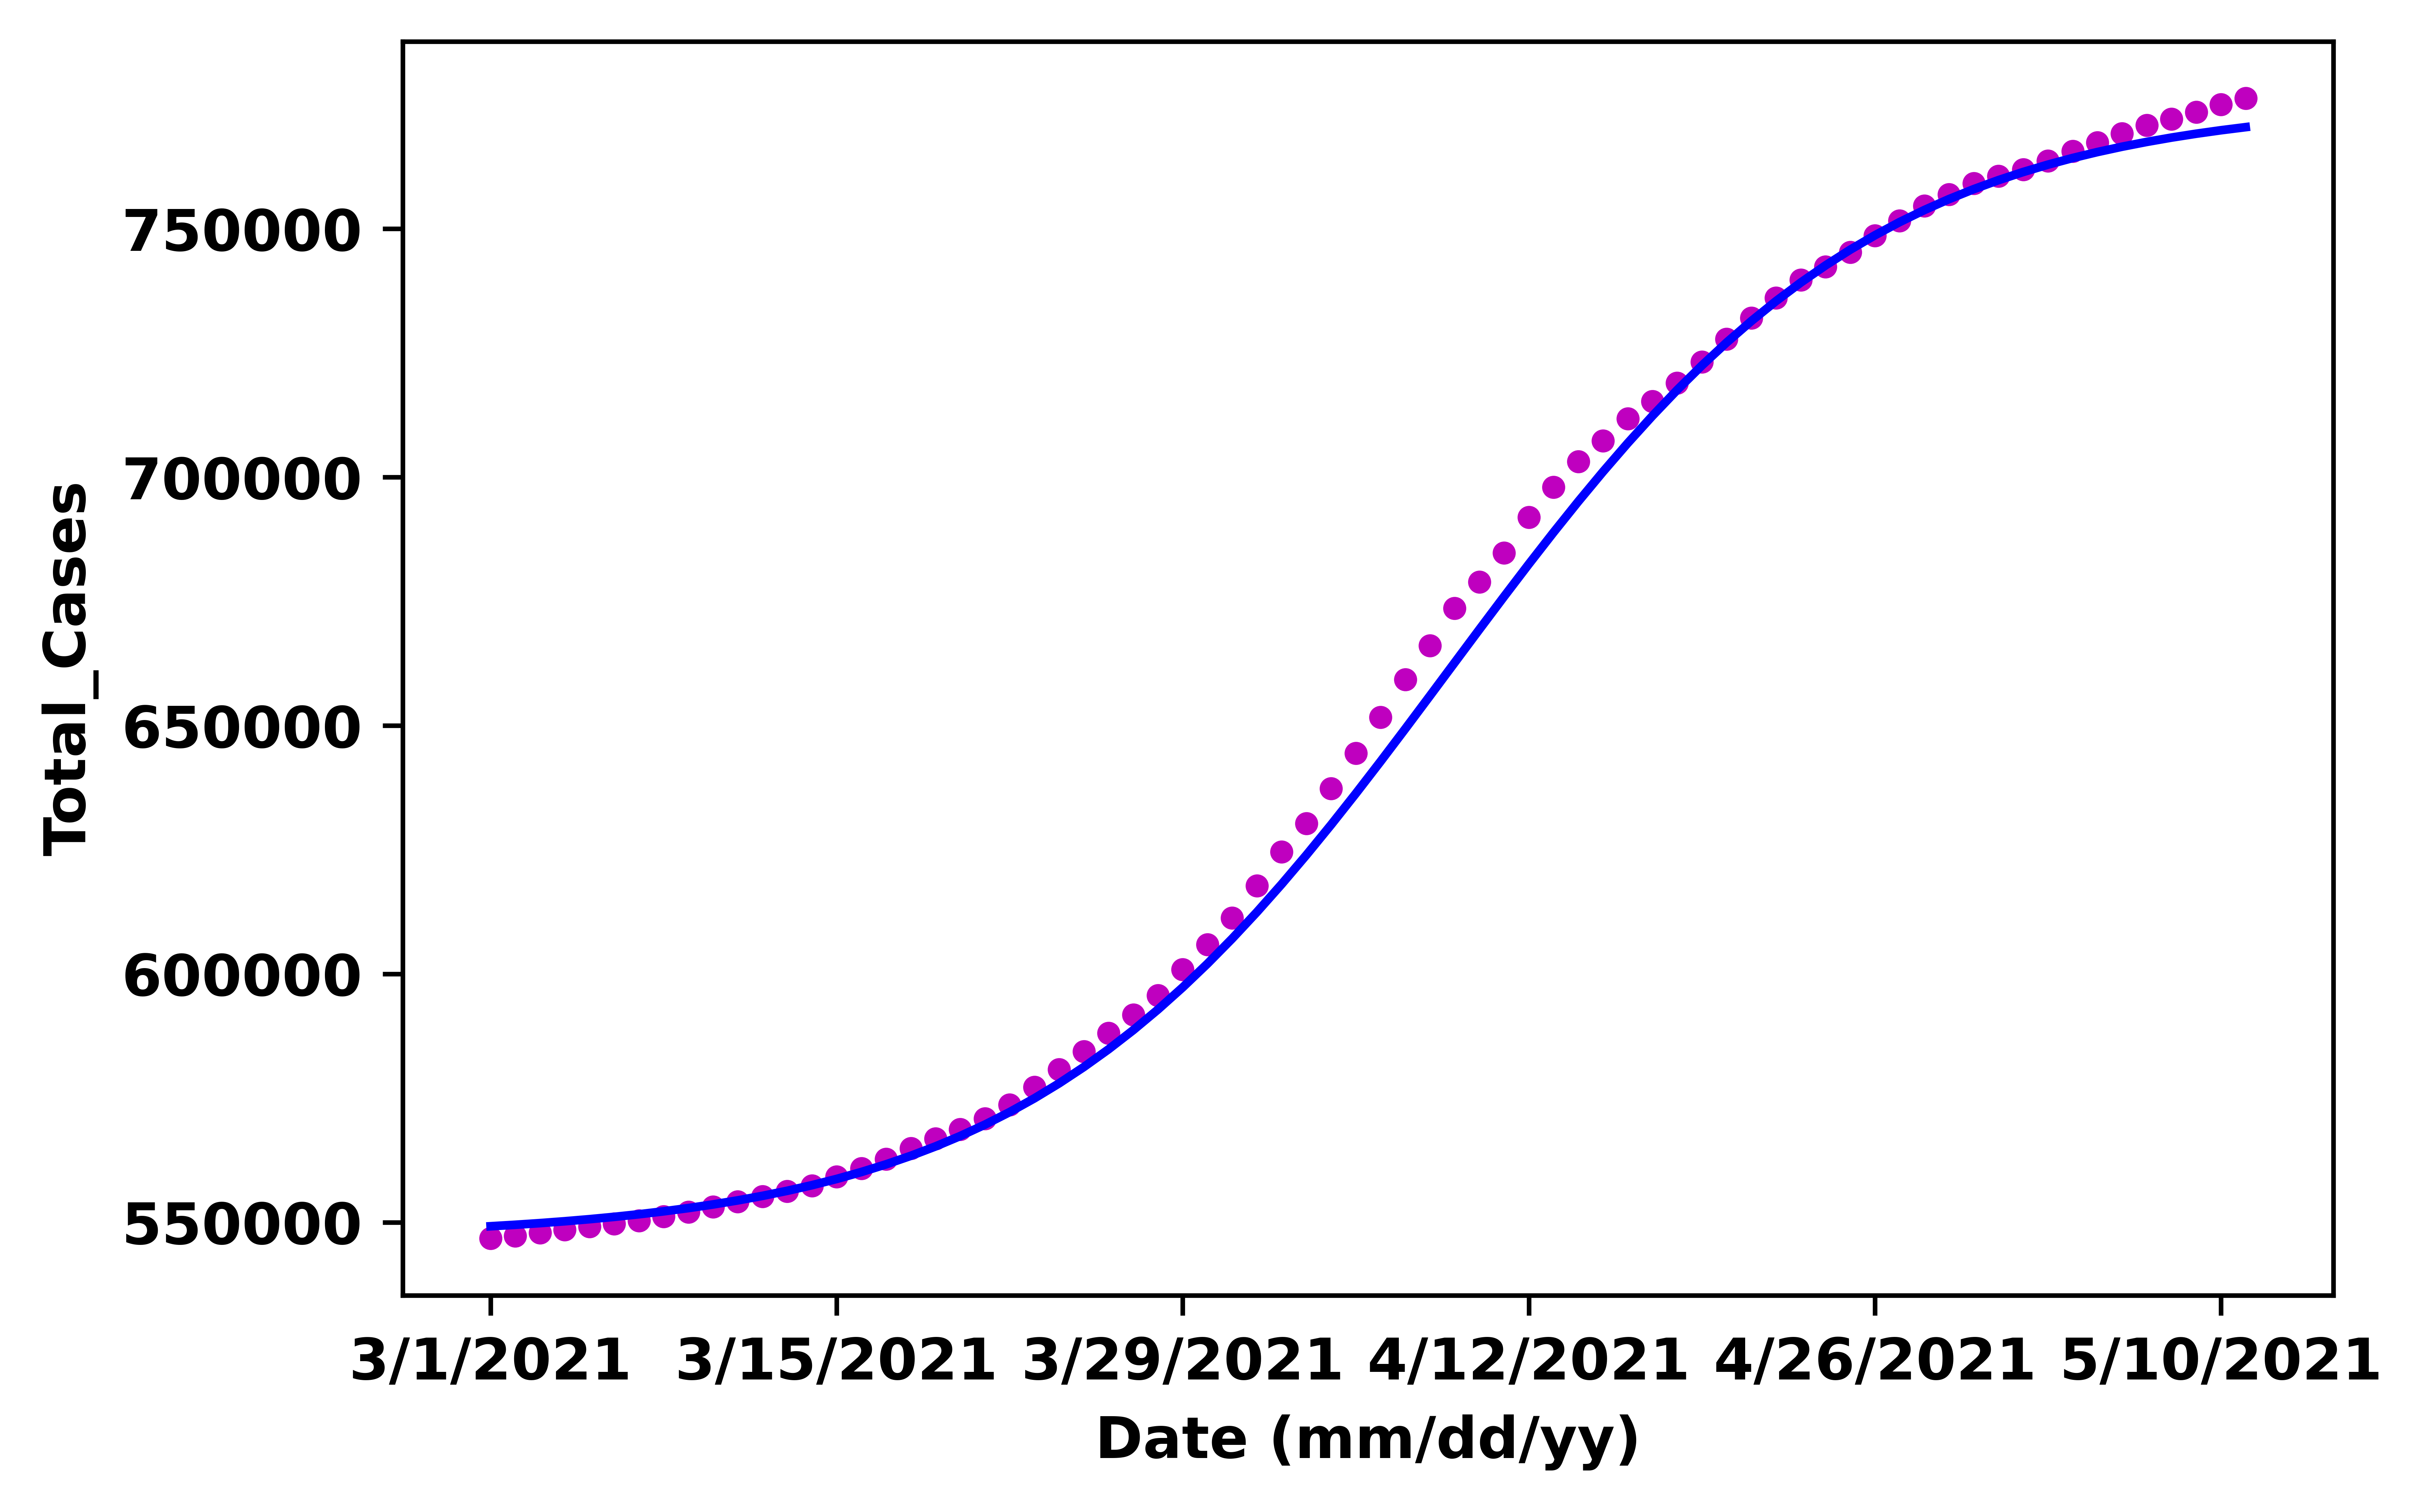

In [10]:
n = len(x3)
for i in range(n):
    prb[i] = sigfunc2(i, ca[0], ca[1], ca[2], ca[3])
figure(dpi=1200)
plt.xticks([i*14 for i in range(6)], fontweight="bold")
plt.yticks([550000,600000,650000,700000,750000], fontweight='bold')
plt.xlabel("Date (mm/dd/yy)", fontweight="bold")
plt.ylabel("Total_Cases", fontweight="bold")
plt.plot(x3,y3, 'm.')
#plt.show()
plt.plot(x3, prb, 'b')
plt.show()

In [11]:
#print(y2.head(),y2.tail())
#print((y2.head(1)+y2.tail(1))/2)

In [12]:
def sigfunc(xn,c1,c2,c3,c4):
    #return  546801 + c1/(c2+c3*np.exp(-c4*(xn)))
    return c1+(c2*xn**c3)/c4
#vg = [300000, 1, 10, 0.09]
vg = [750000,1,3,1]

n = len(x2)

prb = np.empty(n)

for i in range(n):
    prb[i] = sigfunc(i, vg[0], vg[1], vg[2], vg[3])


#plt.plot(x, y)
#plt.axis([0,300,0,500000])
#@plt.xticks([i*14 for i in range(0,6)])
#plt.plot([i for i in range(n)],y2, 'g.')
#plt.show()
#plt.plot([i for i in range(n)], prb, 'b')
#plt.show()

In [13]:
t = data2['no'].values
hr = y2.values
c, cov = curve_fit(sigfunc, t, hr, vg)
print(c)

[7.79640472e+05 4.39921545e-01 3.22060439e+00 1.61793063e+00]


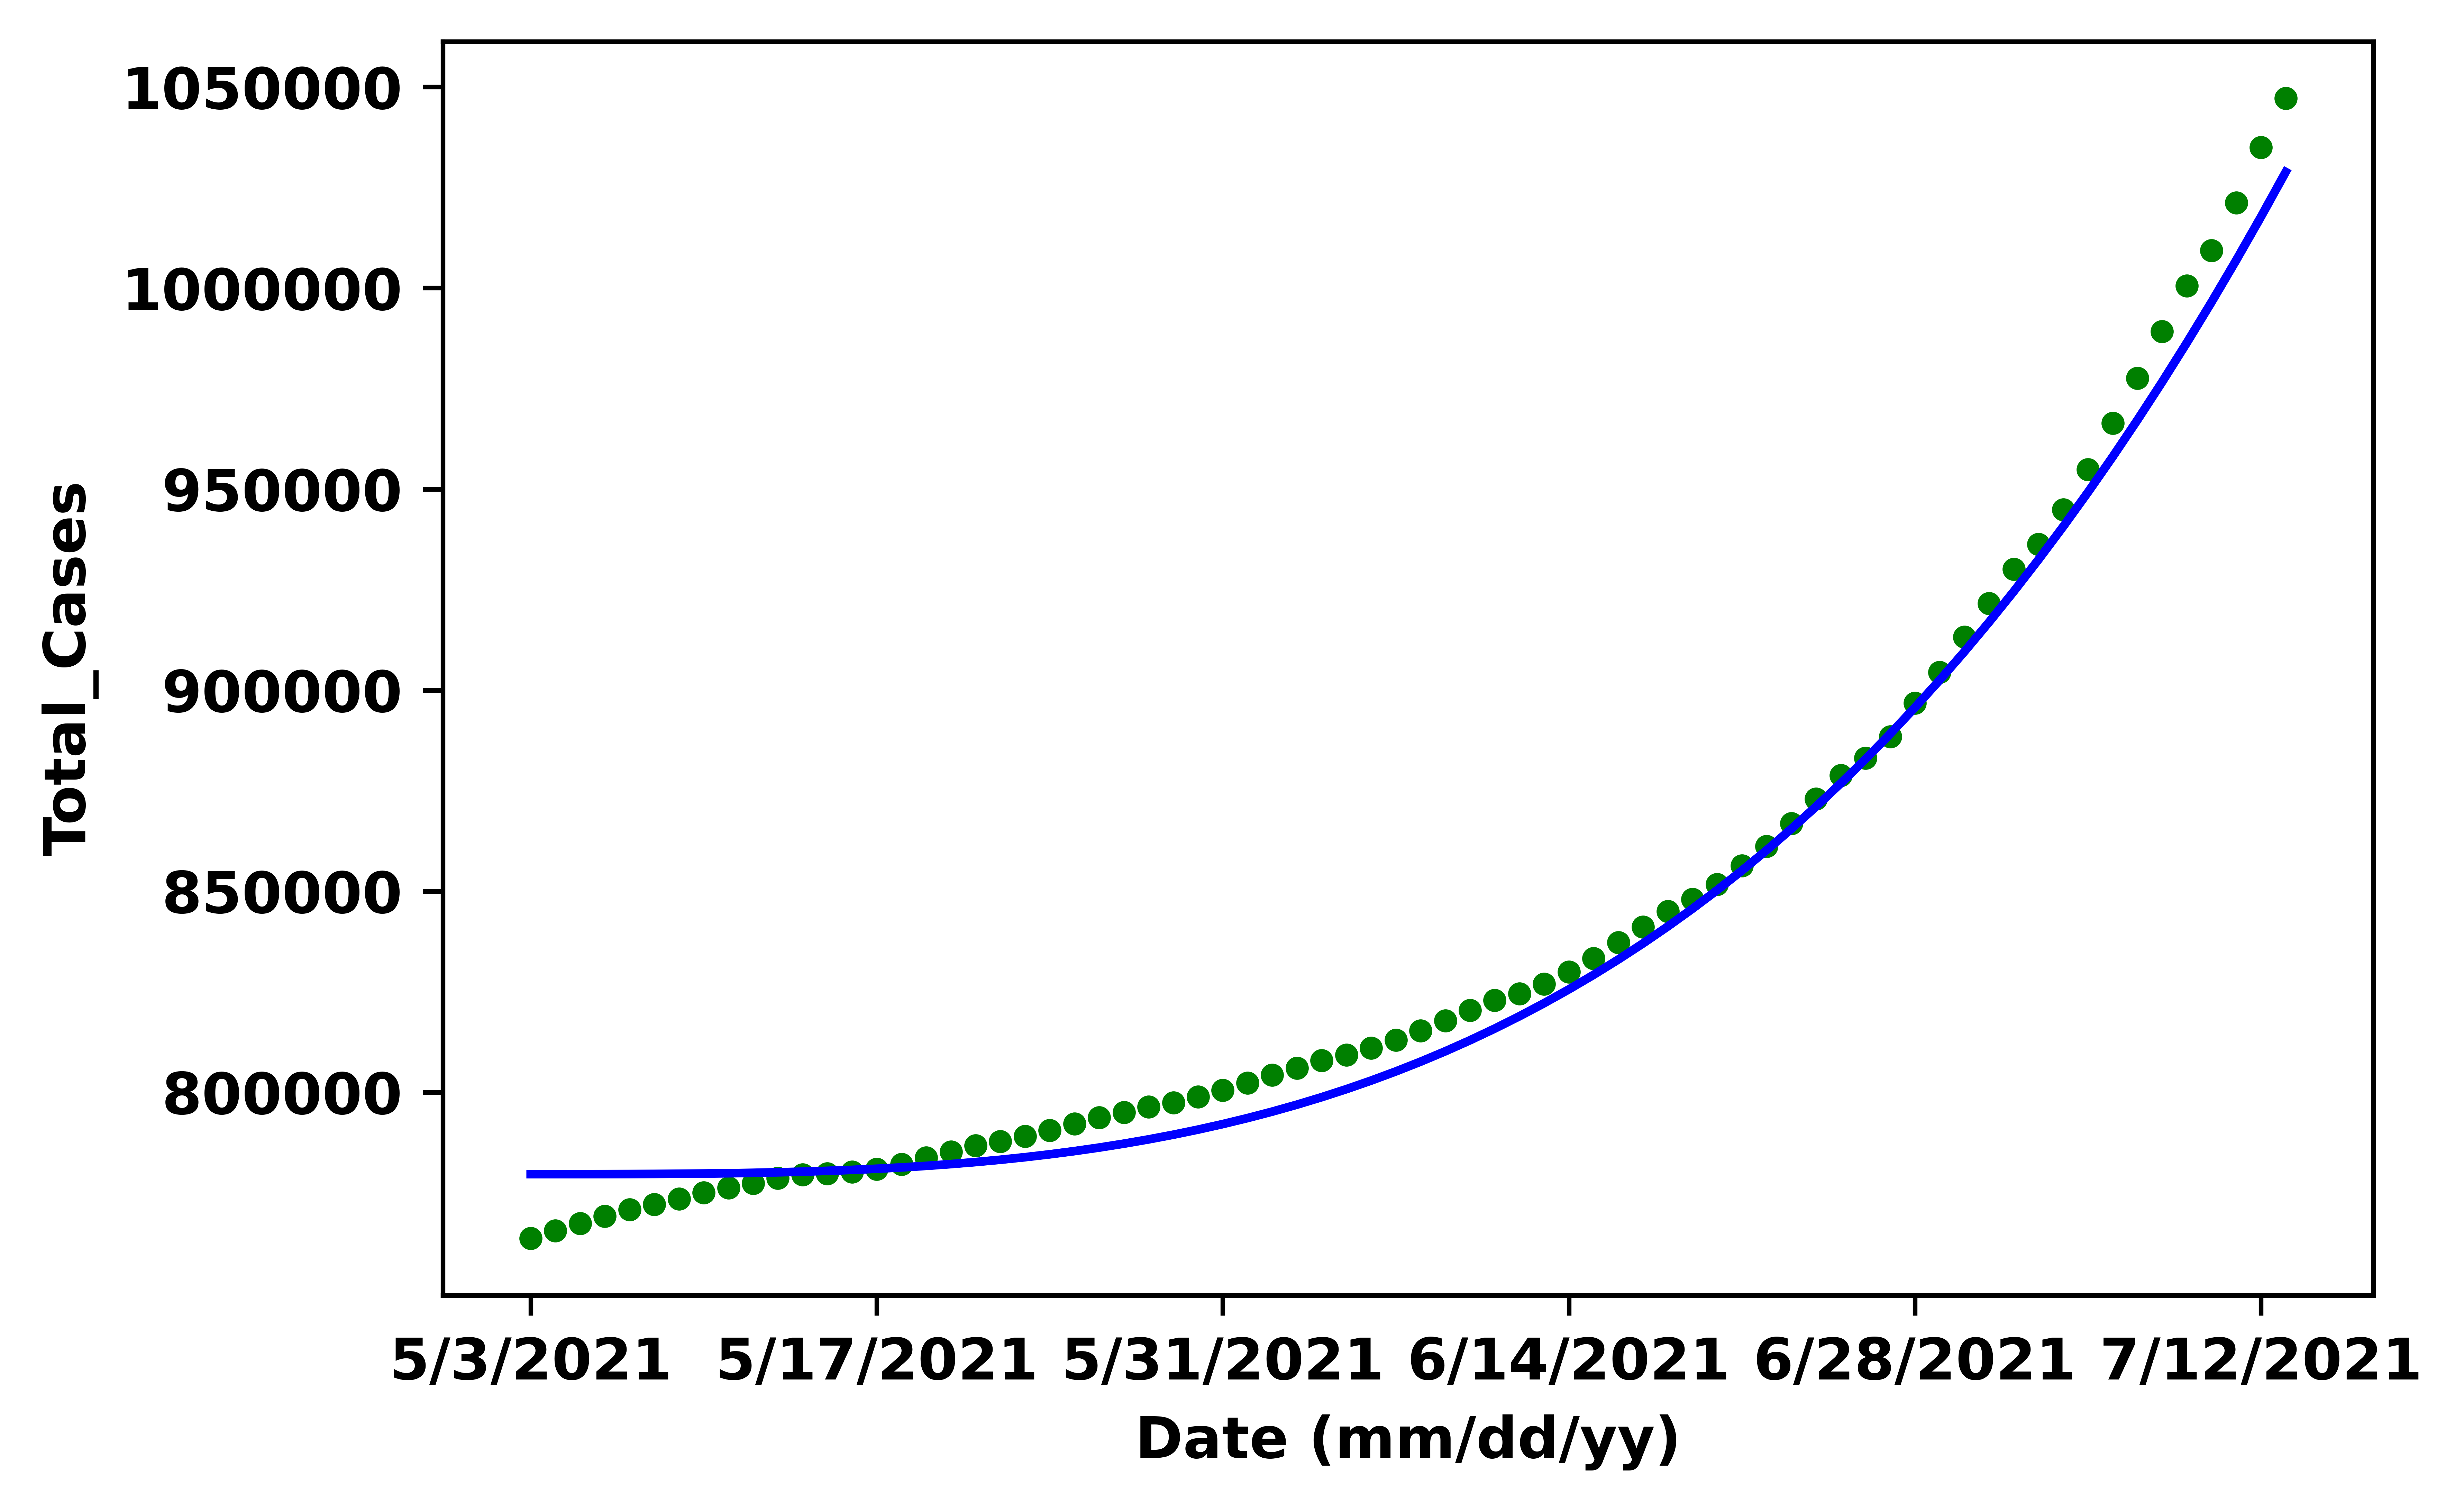

In [14]:
n = len(x2)
for i in range(n):
    prb[i] = sigfunc(i, c[0], c[1], c[2], c[3])
#plt.title("Nonlinear Regression")
figure(dpi=1200)
plt.xlabel("Date (mm/dd/yy)", fontweight="bold")
plt.ylabel("Total_Cases", fontweight="bold")
plt.xticks([i*14 for i in range(6)], fontweight="bold")
plt.yticks((0,800000,850000,900000,950000,1000000,1050000),('0','800000','850000','900000','950000','1000000','1050000'), fontweight="bold")
plt.plot(x2,y2, 'g.')
#plt.show()
plt.plot(x2, prb, 'b')
plt.show()

In [15]:
prb2 = np.empty(200)
for i in range(200):
    prb2[i] = sigfunc(i, c[0], c[1], c[2], c[3])
#plt.plot([i for i in range(n)],y2, 'g.')
#plt.plot([i for i in range(200)], prb2, 'b')
#plt.show()

In [16]:
for i in range(200):
    print(int(prb2[i]))

779640
779640
779643
779649
779664
779688
779727
779783
779860
779962
780092
780254
780453
780692
780975
781308
781693
782136
782640
783211
783852
784569
785366
786247
787218
788282
789446
790713
792089
793579
795187
796918
798778
800772
802905
805182
807607
810187
812927
815831
818906
822156
825587
829205
833014
837020
841229
845646
850276
855126
860201
865506
871048
876831
882862
889145
895688
902495
909573
916927
924563
932487
940704
949222
958045
967179
976631
986406
996511
1006951
1017733
1028862
1040344
1052187
1064395
1076975
1089933
1103275
1117008
1131137
1145669
1160610
1175966
1191744
1207949
1224589
1241669
1259196
1277176
1295616
1314521
1333899
1353755
1374097
1394930
1416261
1438096
1460442
1483306
1506694
1530613
1555068
1580067
1605617
1631723
1658392
1685632
1713448
1741848
1770837
1800423
1830613
1861412
1892829
1924868
1957538
1990845
2024796
2059397
2094656
2130579
2167172
2204443
2242399
2281047
2320393
2360444
2401207
2442689
2484897
2527838
2571519
2615946
26611

In [17]:
from sklearn.metrics import r2_score
print('R'+': ', r2_score(prb, hr))

R:  0.9889248549523554


In [18]:
#plt.hist(data2['new_cases'], bins=30)
#plt.show()